# Trading with Leverage and the Kelly Criterion

## Getting started

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
returns = pd.read_csv("returns.csv", index_col = "Date", parse_dates = ["Date"])

In [ ]:
returns.info()

In [ ]:
returns.cumsum().apply(np.exp).plot(figsize = (12, 8))
plt.show()

In [ ]:
simple = np.exp(returns) - 1 # simple returns
simple

## Recap:  Leverage and Margin Trading

In [ ]:
simple

In [ ]:
symbol = "USD_GBP"

In [ ]:
leverage = 2 # equivalent to a margin of 50%

In [ ]:
instr = simple[symbol].to_frame().copy()
instr

In [ ]:
instr["Lev_Returns"] = instr[symbol].mul(leverage) # multiply simple returns with leverage
instr

In [ ]:
instr["Lev_Returns"] = np.where(instr["Lev_Returns"] < -1, -1, instr["Lev_Returns"]) # loss limited to 100%
instr

In [ ]:
instr.add(1).cumprod().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

## Finding the optimal degree of Leverage

In [ ]:
simple

We can either use __kelly criterion__ or we just __run the backtest for many different leverage settings__.

In [ ]:
leverage = np.arange(1, 5, 0.01)
leverage

In [ ]:
multiple = []
for lever in leverage:
    levered_returns = simple[symbol].mul(lever)
    levered_returns = pd.Series(np.where(levered_returns < -1, -1, levered_returns))
    multiple.append(levered_returns.add(1).prod())
results = pd.DataFrame(data = {"Leverage":list(leverage), "Multiple":multiple})

In [ ]:
results.set_index("Leverage", inplace = True)

In [ ]:
results

In [ ]:
results.min()

In [ ]:
max_multiple = results.max()
max_multiple

In [ ]:
optimal_lev = results.idxmax()
optimal_lev

In [ ]:
results.plot(figsize = (12, 8));
plt.scatter(x = optimal_lev, y = max_multiple, color = "r", s = 50)
plt.xlabel("Leverage", fontsize = 13)
plt.ylabel("Multiple", fontsize = 13)
plt.title("The optimal degree of Leverage", fontsize = 15)
plt.show()

## The Kelly Criterion

In [ ]:
optimal_lev # true/correct value for the optimal leverage

The Kelly Criterion closely approaches the true/correct value, if
- simple returns are used (Yes)
- dataset is sufficiently large (OK)

In [ ]:
instr = simple[symbol].to_frame().copy()
instr

In [ ]:
mu = instr.mean() # mean return (simple)
mu

In [ ]:
var = instr.var() # variance of returns (simple)
var

In [ ]:
kelly = mu / var
kelly

-> Good approximation by __Kelly criterion__

## The impact of Leverage on Reward & Risk

In [ ]:
simple # simple returns

__Reward: 1) Mean of Simple Returns__

In [ ]:
leverage = np.arange(1, 5, 0.01)

In [ ]:
mu = []
sigma = []
sharpe = []
for lever in leverage:
    levered_returns = simple[symbol].mul(lever)
    levered_returns = pd.Series(np.where(levered_returns < -1, -1, levered_returns))
    mu.append(levered_returns.mean()) # mean of simple returns
    sigma.append(levered_returns.std())
    sharpe.append(levered_returns.mean() / levered_returns.std())
results = pd.DataFrame(data = {"Leverage":list(leverage), "Mean": mu, "Std": sigma, "Sharpe": sharpe})

In [ ]:
results.set_index("Leverage", inplace = True)

In [ ]:
results

In [ ]:
results.plot(subplots = True, figsize = (12, 8), fontsize = 12);
plt.show()

__Mean of simple Returns is steadily increasing with higher leverage -> misleading__

__Sharpe Ratio remains constant -> misleading__

__Reward: 2) Mean of Log Returns__

In [ ]:
leverage = np.arange(1, 5, 0.01)

In [ ]:
mu = []
sigma = []
sharpe = []
for lever in leverage:
    levered_returns = simple[symbol].mul(lever)
    levered_returns = pd.Series(np.where(levered_returns < -1, -1, levered_returns))
    levered_returns = np.log(levered_returns + 1) # convert to log returns
    mu.append(levered_returns.mean()) # mean of log returns
    sigma.append(levered_returns.std())
    sharpe.append(levered_returns.mean() / levered_returns.std())
results = pd.DataFrame(data = {"Leverage":list(leverage), "Mean": mu, "Std": sigma, "Sharpe": sharpe})

In [ ]:
results.set_index("Leverage", inplace = True)

In [ ]:
results

In [ ]:
results.plot(subplots = True, figsize = (12, 8), fontsize = 12);
plt.show()

- __Maximum Return @ Kelly__
- __Sharpe Ratio steadily decreasing with higher leverage__.
- __Leverage amplifies losses more than it amplifies gains__.
- __Don´t use leverage if your goal is to maximize risk-adjusted return__
- __If you want to increase return/income with leverage -> Trade-off__
- __Rule of Thumb: Leverage shouldn´t be higher than "Half Kelly".__ 

## Putting everything together

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
returns = pd.read_csv("returns.csv", index_col = "Date", parse_dates = ["Date"])
returns

In [ ]:
def kelly_criterion(series): # assuming series with log returns
    
    series = np.exp(series) - 1
    if series.var() == 0:
        return np.nan
    else:
        return series.mean() / series.var()

In [ ]:
returns.apply(kelly_criterion).sort_values(ascending = False)

In [ ]:
kelly_criterion(returns.Low_Vol)

Side Note: For "Low_Vol", Kelly is not a good approximation because:
- majority of daily returns is zero (neutral)
- only very few "real" observations (non-normal)

In [ ]:
returns.Low_Vol.value_counts()

Bonus Question: What´s the correct/true optimal degree of leverage for "Low_Vol"?

------------------------

## Coding Challenge

__Calculate and compare__ the __Kelly Criterion__ for __30 large US stocks__ that currently form the Dow Jones Industrial Average Index ("Dow Jones") for the time period between April 2019 and June 2021.

__Hint:__ You can __import__ the price data from __"Dow_Jones.csv"__.

Determine the Stock with the __highest and lowest Kelly Criterion__.

(Remark: Dividends are ignored here. Hence, for simplicity reasons, the Kelly Criterion is based on Price Returns only. As a consequence, dividend-paying stocks are getting penalized.) 

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-01,60.227501,197.809998,77.839996,130.699997,111.349998,134.059998,38.330002,68.559998,94.919998,27.040001,...,70.419846,152.110001,79.230003,109.330002,95.199997,237.320007,153.110001,52.919998,43.029999,114.139999
2020-04-02,61.232498,208.880005,76.660004,123.269997,116.739998,134.320007,39.799999,76.120003,96.970001,28.030001,...,73.349236,155.259995,80.139999,114.400002,97.190002,240.440002,157.389999,55.250000,40.320000,118.650002
2020-04-03,60.352501,205.410004,73.599998,124.519997,114.669998,134.309998,39.060001,75.110001,93.879997,27.969999,...,72.757637,153.830002,78.860001,115.080002,93.889999,229.490005,151.850006,54.700001,40.720001,119.480003
2020-04-06,65.617500,211.580002,83.870003,148.770004,120.430000,147.550003,41.430000,80.389999,99.580002,30.540001,...,76.631676,165.270004,84.629997,117.809998,98.980003,248.339996,169.440002,56.700001,42.630001,126.070000
2020-04-07,64.857498,208.779999,87.580002,141.580002,121.919998,145.070007,40.639999,80.919998,101.239998,32.330002,...,74.961830,163.490005,84.160004,112.769997,100.779999,248.039993,168.589996,56.980000,42.810001,121.989998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-08,126.739998,236.820007,166.509995,252.759995,240.160004,236.419998,54.130001,108.730003,176.330002,69.379997,...,72.400002,252.570007,133.350006,134.839996,157.539993,401.739990,232.050003,57.150002,54.000000,139.830002
2021-06-09,127.129997,239.520004,164.089996,248.059998,234.649994,236.089996,54.020000,107.779999,176.039993,68.839996,...,74.040001,253.589996,131.839996,134.789993,154.740005,401.100006,232.309998,57.049999,53.430000,139.080002
2021-06-10,126.110001,244.639999,162.229996,248.339996,225.729996,240.190002,55.029999,108.410004,176.570007,67.989998,...,76.139999,257.239990,130.979996,135.789993,154.020004,401.489990,233.949997,57.340000,55.310001,139.880005


Do not use leverage with BA CSCO CVX DOW IBM INTC MMM MRK TRV VZ WBA


,Optimal Leverage
AAPL,3.873584
MSFT,3.713647
WMT,3.267778
HD,2.455741
PG,2.396974
GS,2.382564
NKE,2.360330
V,2.233538
UNH,2.155487
CAT,2.111833


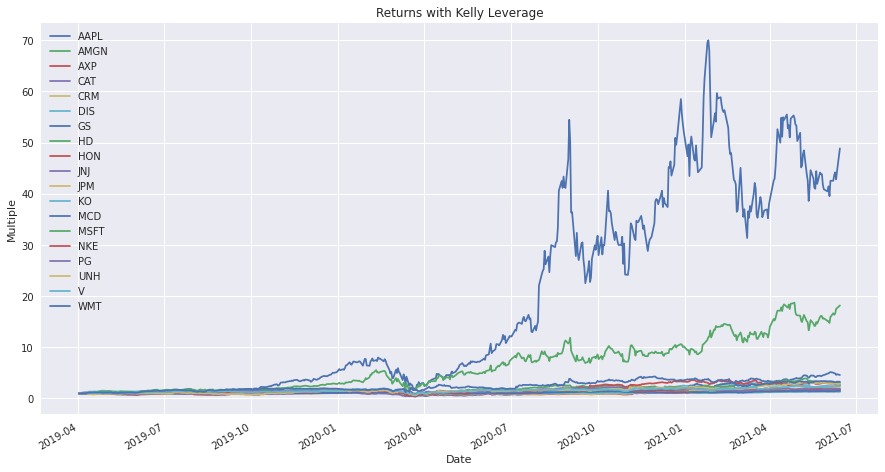

In [198]:
raw = pd.read_csv('Dow_Jones.csv', parse_dates=['Date'], index_col='Date')
raw = raw.loc['2020-04-01':,:]
logr = np.log(norm / norm.shift(1))
simp = np.exp(logr)-1 #get simple returns by taking e^(log_returns)-1
logr.dropna(inplace=True)
#kelly = mean of simp ret / var of simp returns
kelly = simp.mean()/simp.var()
leverage = kelly
levr = logr.mul(leverage)
levr.where(levr >= -1, -1, inplace=True)
levr = logr.mul(leverage)
levr=levr.cumsum().apply(np.exp)
levr = levr.sort_values(levr.last_valid_index(), axis=1, ascending=False)
print("Do not use leverage with", *levr.loc[:,kelly.loc[kelly<1.0].index].columns, sep = ' ')
levr.loc[:,kelly.loc[kelly>1.0].index].plot(figsize=(15,8), logy=0,title='Returns with Kelly Leverage', ylabel='Multiple')
opt_lev = kelly.sort_values(ascending=False).to_frame('Optimal Leverage')
opt_lev.loc[opt_lev.values>1]

## +++ Please stop here in case you don´t want to see the solution!!! +++++

In [80]:
import pandas as pd
import numpy as np

In [81]:
df = pd.read_csv("Dow_Jones.csv", index_col = "Date", parse_dates = ["Date"])
df

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2019-04-01,47.810001,191.770004,111.699997,391.540009,140.250000,161.179993,54.980000,124.940002,112.510002,53.500000,...,79.484734,119.019997,85.230003,103.639999,138.020004,245.539993,157.259995,59.090000,63.490002,97.820000
2019-04-02,48.505001,192.429993,111.000000,390.750000,140.190002,160.509995,55.290001,124.930000,111.959999,56.250000,...,79.398857,119.190002,84.370003,103.750000,136.809998,244.410004,157.779999,58.529999,55.360001,96.940002
2019-04-03,48.837502,192.919998,110.559998,384.739990,139.259995,162.619995,55.630001,123.889999,112.519997,56.880001,...,79.370232,119.970001,84.470001,103.690002,136.600006,245.839996,158.460007,58.869999,54.840000,97.190002
2019-04-04,48.922501,192.330002,110.120003,395.859985,140.130005,158.520004,55.139999,124.800003,114.750000,59.709999,...,78.101143,119.360001,85.279999,103.430000,136.520004,247.389999,157.639999,58.990002,54.150002,98.110001
2019-04-05,49.250000,195.410004,110.959999,391.929993,140.360001,158.559998,55.209999,126.419998,115.000000,57.240002,...,77.433205,119.889999,85.400002,103.650002,136.399994,248.779999,157.649994,59.090000,54.689999,98.830002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-08,126.739998,236.820007,166.509995,252.759995,240.160004,236.419998,54.130001,108.730003,176.330002,69.379997,...,72.400002,252.570007,133.350006,134.839996,157.539993,401.739990,232.050003,57.150002,54.000000,139.830002
2021-06-09,127.129997,239.520004,164.089996,248.059998,234.649994,236.089996,54.020000,107.779999,176.039993,68.839996,...,74.040001,253.589996,131.839996,134.789993,154.740005,401.100006,232.309998,57.049999,53.430000,139.080002
2021-06-10,126.110001,244.639999,162.229996,248.339996,225.729996,240.190002,55.029999,108.410004,176.570007,67.989998,...,76.139999,257.239990,130.979996,135.789993,154.020004,401.489990,233.949997,57.340000,55.310001,139.880005


In [82]:
returns = np.log(df / df.shift()) # log returns
returns

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2019-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-02,0.014432,0.003436,-0.006286,-0.002020,-0.000428,-0.004165,0.005623,-0.000080,-0.004900,0.050124,...,-0.001081,0.001427,-0.010142,0.001061,-0.008806,-0.004613,0.003301,-0.009522,-0.137025,-0.009037
2019-04-03,0.006832,0.002543,-0.003972,-0.015500,-0.006656,0.013060,0.006131,-0.008360,0.004989,0.011138,...,-0.000361,0.006523,0.001185,-0.000578,-0.001536,0.005834,0.004301,0.005792,-0.009437,0.002576
2019-04-04,0.001739,-0.003063,-0.003988,0.028493,0.006228,-0.025535,-0.008847,0.007318,0.019625,0.048556,...,-0.016119,-0.005098,0.009543,-0.002511,-0.000586,0.006285,-0.005188,0.002036,-0.012662,0.009421
2019-04-05,0.006672,0.015887,0.007599,-0.009977,0.001640,0.000252,0.001269,0.012897,0.002176,-0.042247,...,-0.008589,0.004431,0.001406,0.002125,-0.000879,0.005603,0.000063,0.001694,0.009923,0.007312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-08,0.006650,-0.001561,0.003550,0.000396,0.001667,-0.007249,0.003887,0.009054,-0.003736,0.002020,...,-0.005510,-0.004897,-0.004489,-0.011649,-0.001396,0.003716,0.003151,-0.000874,-0.010317,-0.007623
2021-06-09,0.003072,0.011337,-0.014640,-0.018770,-0.023210,-0.001397,-0.002034,-0.008776,-0.001646,-0.007814,...,0.022399,0.004030,-0.011388,-0.000371,-0.017933,-0.001594,0.001120,-0.001751,-0.010612,-0.005378
2021-06-10,-0.008056,0.021151,-0.011400,0.001128,-0.038755,0.017217,0.018524,0.005828,0.003006,-0.012424,...,0.027968,0.014291,-0.006544,0.007392,-0.004664,0.000972,0.007035,0.005070,0.034581,0.005736


In [83]:
def kelly_criterion(series):
    
    series = np.exp(series) - 1
    if series.var() == 0:
        return np.nan
    else:
        return series.mean() / series.var()

In [84]:
returns.apply(kelly_criterion).sort_values(ascending = False)

AAPL    3.873584
MSFT    3.713647
WMT     3.267778
HD      2.455741
PG      2.396974
GS      2.382564
NKE     2.360330
V       2.233538
UNH     2.155487
CAT     2.111833
DIS     1.950995
JNJ     1.878594
HON     1.805036
MCD     1.697870
JPM     1.684360
KO      1.666083
CRM     1.661923
AMGN    1.641593
AXP     1.308429
DOW     0.940106
TRV     0.888073
IBM     0.706791
INTC    0.667557
CSCO    0.439871
MMM     0.261413
CVX     0.168361
MRK     0.141995
VZ      0.135561
WBA     0.037598
BA     -0.027772
dtype: float64

-> highest Kelly: AAPL, Lowest Kelly: BA